In [105]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
# Load dataset
speeches_all = pd.read_csv(os.path.join('.', 'presidential_speeches.csv'), sep=',', encoding='utf8')

speeches_all.sample(10)

,Date,President,Party,Speech Title,Summary,Transcript,URL
814,1987-12-10,Ronald Reagan,Republican,Address to the Nation on the Soviet-U.S. Summi...,NaN,"Good evening. As I am speaking to you now, Gen...",https://millercenter.org/the-presidency/presid...
565,1945-08-06,Harry S. Truman,Democratic,Statement by the President Announcing the Use ...,President Truman reports on the United States'...,Sixteen hours ago an American airplane dropped...,https://millercenter.org/the-presidency/presid...
837,1991-03-06,George H. W. Bush,Republican,Address Before a Joint Session of Congress on ...,Bush declares the end of the Persian Gulf War ...,"Mr. President. And Mr. Speaker, thank you, sir...",https://millercenter.org/the-presidency/presid...
134,1841-08-16,John Tyler,Unaffiliated,Veto Message Regarding the Bank of the United ...,NaN,To the Senate of the United States: The bill e...,https://millercenter.org/the-presidency/presid...
139,1842-08-09,John Tyler,Unaffiliated,Veto Message Regarding Import Duties,NaN,To the House of Representatives of the United ...,https://millercenter.org/the-presidency/presid...
208,1859-02-18,James Buchanan,Democratic,Special Message Regarding Transit Across Centr...,NaN,To the Senate and House of Representatives: Th...,https://millercenter.org/the-presidency/presid...
622,1962-10-22,John F. Kennedy,Democratic,Address on the Buildup of Arms in Cuba,NaN,"Good evening, my fellow citizens: This Governm...",https://millercenter.org/the-presidency/presid...
113,1834-04-15,Andrew Jackson,Democratic,Protest of Senate Censure,Viewing his reelection as a mandate to continu...,To the Senate of the United States: It appears...,https://millercenter.org/the-presidency/presid...
422,1913-04-08,Woodrow Wilson,Democratic,Message Regarding Tariff Duties,President Wilson appears before Congress to re...,"Mr. Speaker, Mr. President, Gentlemen of the C...",https://millercenter.org/the-presidency/presid...
62,1812-06-19,James Madison,Democratic-Republican,Proclamation of a State of War with Great Britain,President Madison declares war on Great Britai...,BY THE PRESIDENT OF THE UNITED STATES OF AMERI...,https://millercenter.org/the-presidency/presid...


In [106]:
# EDA
print(speeches_all['Party'].value_counts())

Democratic               489
Republican               389
Democratic-Republican     65
Unaffiliated              39
Whig                      12
Federalist                 9
Name: Party, dtype: int64


In [107]:
# Filter only Democratic and Republican Presidents
speeches_dem = speeches_all[speeches_all['Party'] == 'Democratic']
speeches_rep = speeches_all[speeches_all['Party'] == 'Republican']
speeches = pd.concat([speeches_dem, speeches_rep])

# Drop columns we won't need
print('Before droping:', speeches.shape)
speeches.drop(['Date', 'Speech Title', 'Summary', 'URL'], axis=1, inplace=True)
print('After droping:', speeches.shape)
speeches.sample(10)

Before droping: (878, 7)
After droping: (878, 3)


,President,Party,Transcript
783,Ronald Reagan,Republican,"Mr. Speaker, Mr. President, distinguished Memb..."
386,William McKinley,Republican,"President Milburn, Director General Buchanan, ..."
752,Jimmy Carter,Democratic,"Mr. President, Mr. Speaker, members of the 95t..."
946,Barack Obama,Democratic,Thank you. Thank you. Thank you very much. Tha...
779,Ronald Reagan,Republican,"Mr. Secretary-General, Mr. President, distingu..."
795,Ronald Reagan,Republican,Thank you very much. In the business that I fo...
844,George H. W. Bush,Republican,Thank you all very much. Good luck. Please be ...
534,Franklin D. Roosevelt,Democratic,My friends: At this moment of sadness througho...
728,Gerald Ford,Republican,I have come to a decision which I felt I shoul...
527,Franklin D. Roosevelt,Democratic,I am glad to come once again to Chicago and es...


In [ ]:
from string import punctuation
from nltk.corpus import stopwords

def preprocess(text: str) -> str:
    text = text.translate(str.maketrans('', '', punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(text)

trascripts_copy = speeches['Transcript'].copy()
trascripts_copy = trascripts_copy.apply(preprocess)
trascripts_copy

In [ ]:
transcripts_df = pd.DataFrame(trascripts_copy, index=speeches.index)
speeches['Cleaned'] = trascripts_copy
speeches.to_csv('presidential_speeches_cleaned.csv', sep=',', index=True)
speeches.head(5)

In [2]:
# Run this except for the first time
speeches_cleaned = pd.read_csv('presidential_speeches_cleaned.csv', sep=',', encoding='utf8')
transcripts_copy = speeches_cleaned['Cleaned'].copy()

In [68]:
# Convert categorical variables to numeric
speeches_cleaned['Party'].replace({'Democratic': 0,'Republican': 1}, inplace=True)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(input='english') # input= is mandatory from v0.25 onwards!
transcripts_vect = vect.fit_transform(transcripts_copy)
transcripts_vect

<878x42059 sparse matrix of type '<class 'numpy.float64'>'
	with 780203 stored elements in Compressed Sparse Row format>

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transcripts_vect, speeches_cleaned['Party'], test_size=0.2, random_state=42)

0.7670454545454546


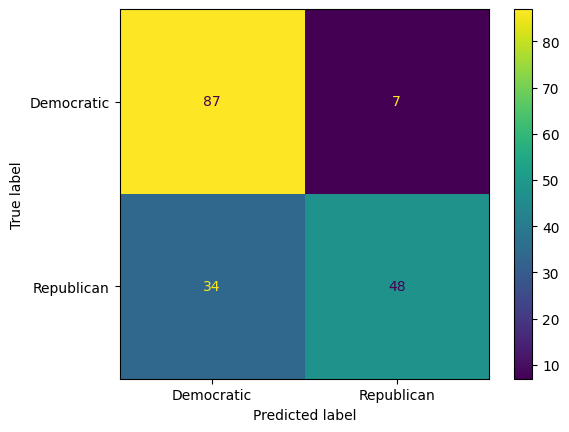

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

print(accuracy_score(y_test, pred))
plot_confusion_matrix(logreg, X_test, y_test)

## SVM Classifier

In [20]:
from sklearn.svm import SVC

svc_0 = SVC(random_state=42)

print('Parameters for svc_0 in use:\n', svc_0.get_params())

Parameters for svc_0 in use:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False} 

Parameters for svc_1 in use:
 {'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'tol': 0.0001, 'verbose': 0}


In [21]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

# Create the parameter grid
C = [.0001, .001, .01, .1, 1, 10, 100]
degree = [1, 2, 3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel': ['linear'], 'probability': probability},
  {'C': C, 'kernel': ['poly'], 'degree': degree, 'probability': probability},
  {'C': C, 'kernel': ['rbf'], 'gamma': gamma, 'probability': probability}
]

# Create a base model
svc = SVC(random_state=42)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits=3, test_size =.2, random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=cv_sets,
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed: 22.3min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear'], 'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'degree': [1, 2, 3, 4, 5], 'kernel': ['poly'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [1, 10, 100], 'kernel': ['rbf'],
                          'probability': [True]}],
             scoring='accuracy', verbose=1)

In [22]:
print("The best hyperparameters from Grid Search are:\n", grid_search.best_params_)
print("\nThe mean accuracy of a model with these hyperparameters is:\n", grid_search.best_score_)

The best hyperparameters from Grid Search are:
 {'C': 10, 'kernel': 'linear', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
 0.839243498817967


In [24]:
best_svc = grid_search.best_estimator_
best_svc.fit(X_train, y_train)

svc_pred = best_svc.predict(X_test)

# Test accuracy
print("Test accuracy:", accuracy_score(y_test, svc_pred))

Test accuracy: 0.7954545454545454


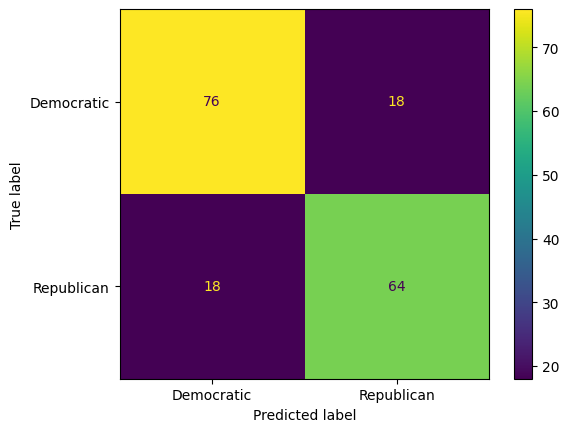

In [25]:
plot_confusion_matrix(best_svc, X_test, y_test)

In [28]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

print(classification_report(y_test, svc_pred))
scores = cross_val_score(estimator=best_svc, X=X_train, y=y_train, cv=10, scoring='f1_macro')
scores

              precision    recall  f1-score   support

  Democratic       0.81      0.81      0.81        94
  Republican       0.78      0.78      0.78        82

    accuracy                           0.80       176
   macro avg       0.79      0.79      0.79       176
weighted avg       0.80      0.80      0.80       176



array([0.9281522 , 0.79796748, 0.85119048, 0.94166667, 0.85119048,
       0.95642249, 0.89746809, 0.89746809, 0.77805961, 0.92784993])

## SGD

In [33]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
              precision    recall  f1-score   support

  Democratic       0.79      0.81      0.80        94
  Republican       0.78      0.76      0.77        82

    accuracy                           0.78       176
   macro avg       0.78      0.78      0.78       176
weighted avg       0.78      0.78      0.78       176



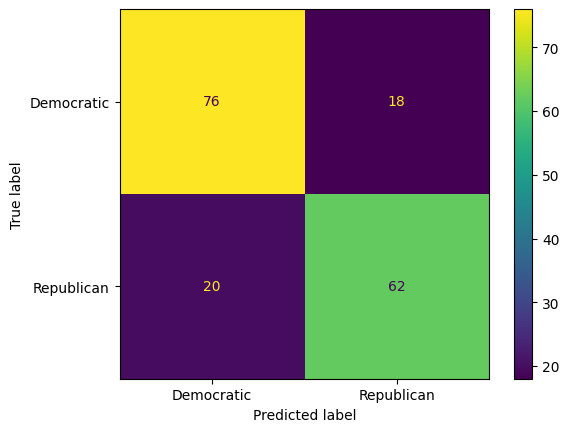

In [36]:

params = [{'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0],
           'loss': ['perceptron', 'hinge', 'log'],
           'penalty': ['l2', 'l1']}]

gs_sgd = GridSearchCV(estimator=sgd, param_grid=params, scoring='f1_macro', cv=10, n_jobs=-1, refit=True)
gs_sgd.fit(X_train, y_train)

print(gs_sgd.best_params_)
sgd_pred = gs_sgd.best_estimator_.predict(X_test)
print(classification_report(y_test, sgd_pred))
scores = cross_val_score(estimator=gs_sgd, X=X_train, y=y_train, cv=10, scoring='f1_macro')
plot_confusion_matrix(gs_sgd, X_test, y_test)

## Deep Learning models

### Multivariate Logistic Regression

In [71]:
y_train.head()

290    0
685    1
547    1
833    1
770    1
Name: Party, dtype: int64

In [98]:
def vectorize_sequences(sequences, dim):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results.astype('float32')

X_train_dl = vectorize_sequences(X_train.astype('int').todense(), 100)
X_test_dl = vectorize_sequences(X_test.astype('int').todense(), 100)

X_train_dl.shape, X_test_dl.shape

100

In [38]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

np.random.seed(1234)
tf.random.set_seed(1234)

In [79]:
deep1 = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[X_train_dl.shape[1]])])
optimizer = tf.keras.optimizers.SGD(0.1)
deep1.compile(loss='mean_squared_error',optimizer=optimizer)
history = deep1.fit(X_train_dl, y_train, epochs=100, batch_size=100)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.3397
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2613
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2472
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2531
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2534
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2488
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2470
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2533
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2585
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2573
Epoch 11/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2469
Epoch 12/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2536
Epoch 13/100
8/8 [==============================] - 0s 3ms/st

In [99]:
deep2 = tf.keras.models.Sequential()
deep2.add(tf.keras.layers.Input(shape=(100,)))
deep2.add(tf.keras.layers.Dense(500, activation='relu', name='hidden'))
deep2.add(tf.keras.layers.Dense(1, activation='sigmoid', name='affine'))

# sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
deep2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = deep2.fit(X_train_dl, y_train, epochs=20, validation_data=(X_test_dl, y_test), batch_size=500)

Epoch 1/20
2/2 [==============================] - 1s 590ms/step - loss: 0.6941 - accuracy: 0.4459 - val_loss: 0.6916 - val_accuracy: 0.5341
Epoch 2/20
2/2 [==============================] - 0s 36ms/step - loss: 0.6898 - accuracy: 0.5627 - val_loss: 0.6908 - val_accuracy: 0.5341
Epoch 3/20
2/2 [==============================] - 0s 39ms/step - loss: 0.6870 - accuracy: 0.5627 - val_loss: 0.6911 - val_accuracy: 0.5341
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.6861 - accuracy: 0.5627 - val_loss: 0.6922 - val_accuracy: 0.5341
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.6855 - accuracy: 0.5627 - val_loss: 0.6931 - val_accuracy: 0.5341
Epoch 6/20
2/2 [==============================] - 0s 41ms/step - loss: 0.6853 - accuracy: 0.5627 - val_loss: 0.6937 - val_accuracy: 0.5341
Epoch 7/20
2/2 [==============================] - 0s 52ms/step - loss: 0.6855 - accuracy: 0.5627 - val_loss: 0.6940 - val_accuracy: 0.5341
Epoch 8/20
2/2 [==========

In [100]:
loss, accuracy = deep2.evaluate(X_train_dl, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = deep2.evaluate(X_test_dl, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5627
Testing Accuracy:  0.5341


In [83]:
deep1.fit(x=X_train_dl, y=y_train, epochs=50)

Epoch 1/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2472
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2496
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2505
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2481
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2496
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2478
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2481
Epoch 8/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2497
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2476
Epoch 10/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2481
Epoch 11/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2496
Epoch 12/50
22/22 [==============================] - 0s 2ms/step - loss: 0.2480
Epoch 13/50
22/22 [==============================

dict_keys(['loss'])


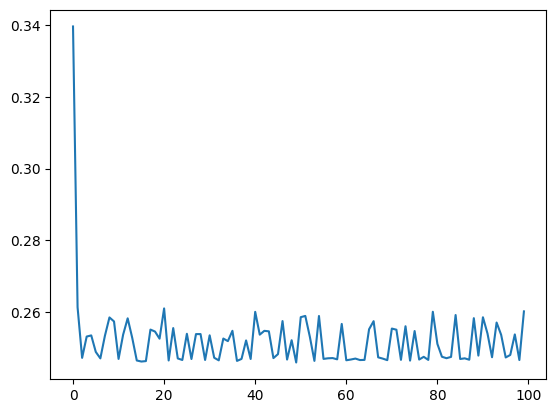

In [84]:
print(history.history.keys())
plt.plot(history.history['loss'])

In [86]:
from sklearn.metrics import mean_squared_error as mse

y_pred = deep1.predict(X_test_dl)
print(mse(y_test, y_pred))

0.2491660844874288


# # COOL STUFF FOR READ.ME

In [108]:
speeches['President'].value_counts()

Lyndon B. Johnson        71
Ronald Reagan            59
Barack Obama             50
Franklin D. Roosevelt    49
John F. Kennedy          44
Bill Clinton             39
George W. Bush           39
Woodrow Wilson           33
Ulysses S. Grant         32
Andrew Johnson           31
Herbert Hoover           30
Grover Cleveland         30
Andrew Jackson           26
James K. Polk            25
Richard M. Nixon         23
George H. W. Bush        23
Benjamin Harrison        23
Jimmy Carter             22
Theodore Roosevelt       22
Donald Trump             19
Harry S. Truman          19
Warren G. Harding        18
Rutherford B. Hayes      16
Franklin Pierce          15
Abraham Lincoln          15
Gerald Ford              14
James Buchanan           14
William McKinley         14
William Taft             12
Calvin Coolidge          12
Joe Biden                11
Chester A. Arthur        11
Martin Van Buren         10
Dwight D. Eisenhower      6
James A. Garfield         1
Name: President, dty

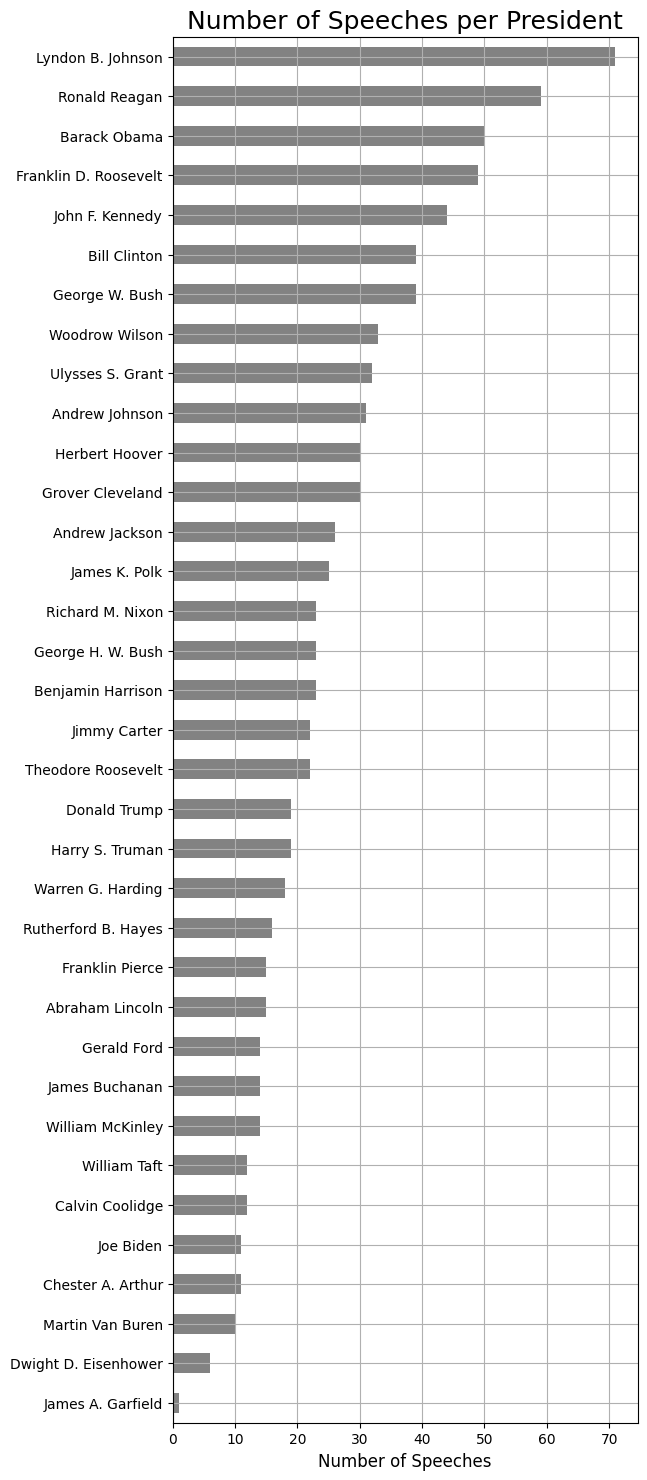

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 18))
n_speeches_potus = speeches['President'].value_counts(ascending=True)
n_speeches_potus.plot(kind='barh', color='#828282', grid=True)
plt.xlabel('Number of Speeches', fontsize=12)
plt.title('Number of Speeches per President', fontsize=18)
plt.show()

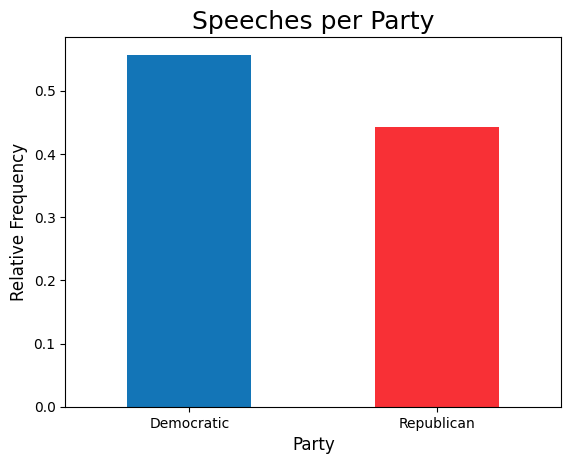

In [163]:
n_speeches_party = speeches['Party'].value_counts(normalize=True)
n_speeches_party.plot(kind='bar', color=['#1375b7', '#f83036'], rot=0)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Relative Frequency', fontsize=12)
plt.title('Speeches per Party', fontsize=18)
plt.show()

In [165]:
speeches_all['Party'].value_counts()

Democratic               489
Republican               389
Democratic-Republican     65
Unaffiliated              39
Whig                      12
Federalist                 9
Name: Party, dtype: int64